In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
%matplotlib inline
warnings.filterwarnings('ignore')

In [160]:
TEST_SIZE = .30
RANDOM_STATE = 4444
HOUSE_DICT = {'democrat': 1, 'republican': 0}
RATING_DICT = {'PG-13': 3, 'R': 2, 'PG': 1, 'G': 0}
SURVIVE_DICT = {1: '>5yrs', 2: '<5yrs'}

# Challenge Set 7

### Challenge 1

In [3]:
house = pd.read_csv("house-votes-84.data", header = None)
house.iloc[:, -1] = house.iloc[:, -1].str.strip(".")
house = house.replace({"y": 1, "n": 0, "?": np.nan})
house = house.fillna(house.mean())

In [4]:
house.tail(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
434,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.427518,0.0,republican


### Challenge 2

In [5]:
X = house.iloc[:, :-1]
y = house.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

### Challenge 3

In [6]:
acc = []
for k in range(1, 21):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    acc += [(k, accuracy_score(knn.predict(X_test), y_test))]
acc.sort(key = (lambda x: x[1]), reverse = True)

In [7]:
best_k = acc[0][0]
print("The highest accuracy,", str(acc[0][1]) + ", occurs when k =", best_k)

The highest accuracy, 0.931297709924, occurs when k = 6


### Challenge 4

In [8]:
logr = LogisticRegression()
fit = logr.fit(X_train, y_train)
log_acc = accuracy_score(logr.predict(X_test), y_test)

In [9]:
print("The test accuracy for logistic regression is", log_acc)

The test accuracy for logistic regression is 0.93893129771


### Challenge 5

In [10]:
ct = pd.DataFrame(y.value_counts())
ct.reset_index(inplace = True)
ct['index_num'] = ct['index'].map(lambda x: HOUSE_DICT[x])

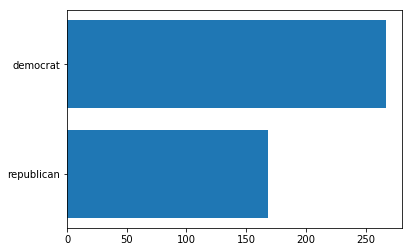

In [11]:
plt.figure()
plt.barh(ct['index_num'], ct.iloc[:, 1], tick_label = ct['index'])
plt.show()

In [12]:
def always_predict_democrat(X):
    """
    X: an array or matrix with input examples
    """
    return ['democrat'] * len(X)

In [13]:
def always_predict_republican(X):
    """
    X: an array or matrix with input examples
    """
    return ['republican'] * len(X)

### Challenge 6

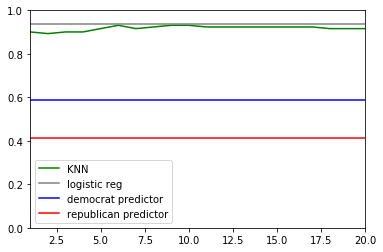

In [14]:
acc.sort(key = (lambda x: x[0]))
unzip_acc = list(zip(*acc))
y_axis = unzip_acc[1]
x_axis = unzip_acc[0]
acc_d = accuracy_score(always_predict_democrat(X_test), y_test)
acc_r = accuracy_score(always_predict_republican(X_test), y_test)
plt.figure()
plt.ylim([0, 1])
plt.xlim([min(x_axis), max(x_axis)])
plt.plot(x_axis, y_axis, "g-", label = "KNN")
plt.axhline(y = log_acc, color = "grey", label = "logistic reg")
plt.axhline(y = acc_d, color = "blue", label = "democrat predictor")
plt.axhline(y = acc_r, color = "red", label = "republican predictor")
plt.legend()
plt.show()

### Challenge 7

In [15]:
m, train_err, ts_err = learning_curve(logr, X, y)
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)

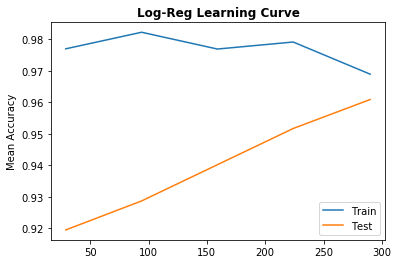

In [16]:
plt.figure()
plt.plot(m, train_cv_err, label = "Train")
plt.plot(m, test_cv_err, label = "Test")
plt.title("Log-Reg Learning Curve", fontweight = "bold")
plt.ylabel("Mean Accuracy")
plt.legend()
plt.show()

In [17]:
best_knn = KNeighborsClassifier(best_k)
m, train_err, ts_err = learning_curve(knn, X, y)
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)

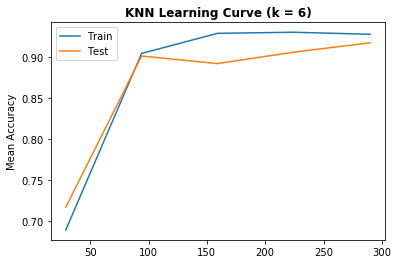

In [18]:
plt.figure()
plt.plot(m, train_cv_err, label = "Train")
plt.plot(m, test_cv_err, label = "Test")
plt.title("KNN Learning Curve (k = " + str(best_k) + ")", fontweight = "bold")
plt.ylabel("Mean Accuracy")
plt.legend()
plt.show()

### Challenge 8

In [19]:
def get_test_acc(modelname, *args, **kwargs):
    model = modelname(*args, **kwargs)
    model.fit(X_train, y_train)
    acc = accuracy_score(model.predict(X_test), y_test)
    print(modelname.__name__, "test accuracy:", acc)
    return acc

In [21]:
acc = get_test_acc(LogisticRegression)
acc = get_test_acc(KNeighborsClassifier, best_k)
acc = get_test_acc(GaussianNB)
acc = get_test_acc(SVC)
acc = get_test_acc(DecisionTreeClassifier)
acc = get_test_acc(RandomForestClassifier)

LogisticRegression test accuracy: 0.93893129771
KNeighborsClassifier test accuracy: 0.931297709924
GaussianNB test accuracy: 0.93893129771
SVC test accuracy: 0.954198473282
DecisionTreeClassifier test accuracy: 0.954198473282
RandomForestClassifier test accuracy: 0.954198473282


### Challenge 9

In [22]:
def get_cv_acc(modelname, *args, **kwargs):
    model = modelname(*args, **kwargs)
    mean_acc = np.mean(cross_val_score(model, X, y))
    print(modelname.__name__, "mean CV accuracy:", mean_acc)
    return mean_acc

In [24]:
acc = get_cv_acc(LogisticRegression)
acc = get_cv_acc(KNeighborsClassifier, best_k)
acc = get_cv_acc(GaussianNB)
acc = get_cv_acc(SVC)
acc = get_cv_acc(DecisionTreeClassifier)
acc = get_cv_acc(RandomForestClassifier)

LogisticRegression mean CV accuracy: 0.96091954023
KNeighborsClassifier mean CV accuracy: 0.933333333333
GaussianNB mean CV accuracy: 0.931034482759
SVC mean CV accuracy: 0.954022988506
DecisionTreeClassifier mean CV accuracy: 0.95632183908
RandomForestClassifier mean CV accuracy: 0.958620689655


### Challenge 10

In [25]:
house = pd.read_csv("house-votes-84.data", header = None)
house = house.iloc[:, :-1].copy()
house = house.replace({"y": 1, "n": 0, "?": np.nan})
house = house.fillna(np.round(house.mean()))

In [26]:
house.tail(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
434,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0


In [27]:
X = house.iloc[:, 1:] 
y = house.iloc[:, 0] # I'm picking the first vote as my target

In [28]:
acc = get_cv_acc(LogisticRegression)

LogisticRegression mean CV accuracy: 0.6756145139


### Challenge 11

In [29]:
movie = pd.read_csv("2013_movies.csv")

In [30]:
movie.tail(1)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
99,Her,23000000.0,25568251,Spike Jonze,R,120,2013-12-18 00:00:00


In [31]:
movie['Rating'].value_counts()

PG-13    47
R        37
PG       15
G         1
Name: Rating, dtype: int64

In [32]:
ct = pd.DataFrame(movie['Rating'].value_counts())
ct.reset_index(inplace = True)
ct['index_num'] = ct['index'].map(lambda x: RATING_DICT[x])

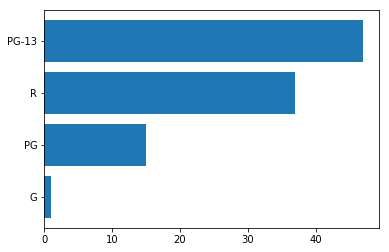

In [33]:
plt.figure()
plt.barh(ct['index_num'], ct.iloc[:, 1], tick_label = ct['index'])
plt.show()

In [34]:
X = movie.loc[:, ['Budget', 'DomesticTotalGross', 'Runtime']]
X = X.fillna(X.mean())
y = movie['Rating']
#y = label_binarize(y, classes = list(y.value_counts().index))
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

In [35]:
# def get_multiclass_cv_acc(modelname, *args, **kwargs):
#     model = OneVsRestClassifier(modelname(*args, **kwargs))
#     mean_acc = np.mean(cross_val_score(model, X, y))
#     print(modelname.__name__, "mean CV accuracy for multi-classes:", mean_acc)
#     return mean_acc

In [43]:
#acc = get_cv_acc(LogisticRegression)
logr = LogisticRegression()
logr = logr.fit(X_train, y_train)
logr_acc = accuracy_score(logr.predict(X_test), y_test)
print("LogisticRegression test accuracy:", logr_acc)

LogisticRegression test accuracy: 0.466666666667


In [39]:
#acc = get_cv_acc(KNeighborsClassifier)
acc = get_test_acc(KNeighborsClassifier)

KNeighborsClassifier test accuracy: 0.566666666667


In [37]:
def always_predict_most_common_rating(X):
    """
    X: an array or matrix with input examples
    """
    return [ct.iloc[0]['index']] * len(X)

In [38]:
correct = sum(always_predict_most_common_rating(X_test) == y_test)
tot_n = len(y_test)
acc = correct / tot_n
print("Test accuracy when always predict the most common rating:", acc)

Test accuracy when always predict the most common rating: 0.466666666667


**How much better do KNN and logistic regression do versus the baseline?**

They are actually not doing any better than the baseline if we used accuracy as the evaluation metric.

**What are the coefficients of logistic regression? Which features affect the outcome how?**

In [64]:
logr_coef = pd.DataFrame(logr.coef_, columns = X.columns)
logr_coef = logr_coef.set_index(logr.classes_)
print("Logistic regression coefficient table:\n\n", logr_coef)

Logistic regression coefficient table:

              Budget  DomesticTotalGross       Runtime
G     -8.502649e-08        1.970775e-09 -1.876850e-12
PG    -5.973429e-09       -8.805605e-09 -9.874941e-14
PG-13  6.563587e-09       -3.871376e-09 -2.079594e-14
R     -1.394498e-08        2.313955e-09  7.607976e-14


I don't think these features were very good predictors, and the features were probably correlated to each other. But in general, the higher the budget, the less likely the movie was rated G. On the other hand, the higher the domestic total gross, the less likely the movie was rated PG.

### Challenge 12

In [89]:
cancer = pd.read_csv("haberman.data", header = None)
cancer.columns = ['age', 'year', 'pos_node', 'Survived']

In [90]:
cancer.tail(1)

,age,year,pos_node,Survived
305,83,58,2,2


**What is the average and standard deviation of the age of all of the patients?**

In [92]:
cancer[['age']].groupby(lambda dummy: 0).agg(['mean', 'std'])

age           
        mean        std
0  52.457516  10.803452

**What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?**

In [97]:
cond = cancer['Survived'] == 1
cancer.loc[cond, 'age'].groupby(lambda dummy: 0).agg(['mean', 'std'])

,mean,std
0,52.017778,11.012154


**What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?**

In [98]:
cond = cancer['Survived'] == 2
cancer.loc[cond, 'age'].groupby(lambda dummy: 0).agg(['mean', 'std'])

,mean,std
0,53.679012,10.167137


**Plot a histogram of the ages side by side with a histogram of the number of axillary nodes**

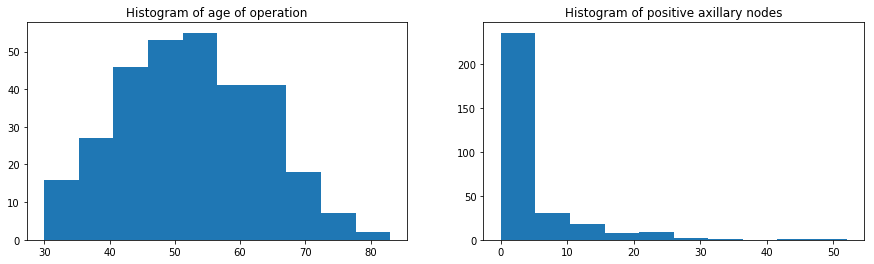

In [103]:
plt.subplots(1, 2, figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.hist(cancer['age'])
plt.title("Histogram of age of operation")
plt.subplot(1, 2, 2)
plt.hist(cancer['pos_node'])
plt.title("Histogram of positive axillary nodes")
plt.show()

**What is the earliest year of surgery in this dataset?**

In [106]:
print(min(cancer['age']))

30


**What is the most recent year of surgery?**

In [108]:
print(max(cancer['year'] + 1900))

1969


**Use logistic regression to predict survival after 5 years. How well does your model do?**

In [111]:
X = cancer.iloc[:, :-1]
y = cancer.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

In [112]:
#acc = get_cv_acc(LogisticRegression)
logr = LogisticRegression()
logr = logr.fit(X_train, y_train)
logr_acc = accuracy_score(logr.predict(X_test), y_test)
print("LogisticRegression test accuracy:", logr_acc)

LogisticRegression test accuracy: 0.815217391304


**What are the coefficients of logistic regression? Which features affect the outcome how?**

In [129]:
logr_coef = pd.DataFrame(logr.coef_, columns = X.columns)
print("Logistic regression coefficients:\n\n", logr_coef)

Logistic regression coefficients:

         age      year  pos_node
0  0.015552 -0.028993  0.071362


Survival chance decresed the older the patient was and the more positive axillary nodes the patient had. On the other hand, the more recent the patient had the surgery, the more likely the patient survived longer.

**Draw the learning curve for logistic regression in this case**

In [141]:
m, train_err, ts_err = learning_curve(logr, X, y)
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)

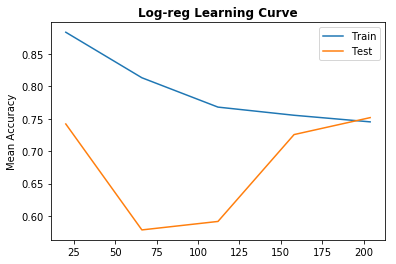

In [142]:
plt.figure()
plt.plot(m, train_cv_err, label = "Train")
plt.plot(m, test_cv_err, label = "Test")
plt.title("Log-reg Learning Curve", fontweight = "bold")
plt.ylabel("Mean Accuracy")
plt.legend()
plt.show()

<br />
<br />
# Challenge Set 8

### Challenge 1

In [391]:
#rerun data just to make sure I'm using the right one
house = pd.read_csv("house-votes-84.data", header = None)
house.iloc[:, -1] = house.iloc[:, -1].str.strip(".")
house = house.replace({"y": 1, "n": 0, "?": np.nan})
house = house.fillna(house.mean())
X = house.iloc[:, :-1]
y = house.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

In [392]:
def get_test_metrics(modelname, test_label, test_pred, mypos = 'democrat'):
    mypos_label = mypos #Assuming democrat is the "event"
    accuracy = accuracy_score(test_label, test_pred)
    precision = precision_score(test_label, test_pred, pos_label = mypos_label) 
    recall = recall_score(test_label, test_pred, pos_label = mypos_label)
    f1 = f1_score(test_label, test_pred, pos_label = mypos_label)
    print(modelname, "test set",
          "accuracy", format(accuracy, "8.6f"), 
          "precision", format(precision, "8.6f"), 
          "recall", format(recall, "8.6f"), 
          "f1", format(f1, "8.6f"))
    return accuracy, precision, recall, f1

In [393]:
def get_test_pred(modelname, *args, **kwargs):
    model = modelname(*args)
    model.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    get_test_metrics(modelname.__name__, y_test, test_pred, **kwargs)
    return test_pred

In [394]:
logr_pred = get_test_pred(LogisticRegression)
knn_pred = get_test_pred(KNeighborsClassifier, best_k)
nb_pred = get_test_pred(GaussianNB)
svm_pred = get_test_pred(SVC)
tree_pred = get_test_pred(DecisionTreeClassifier)
rf_pred = get_test_pred(RandomForestClassifier)

LogisticRegression test set accuracy 0.938931 precision 0.925926 recall 0.974026 f1 0.949367
KNeighborsClassifier test set accuracy 0.931298 precision 0.925000 recall 0.961039 f1 0.942675
GaussianNB test set accuracy 0.938931 precision 0.915663 recall 0.987013 f1 0.950000
SVC test set accuracy 0.954198 precision 0.949367 recall 0.974026 f1 0.961538
DecisionTreeClassifier test set accuracy 0.946565 precision 0.948718 recall 0.961039 f1 0.954839
RandomForestClassifier test set accuracy 0.938931 precision 0.915663 recall 0.987013 f1 0.950000


### Challenge 2

In [400]:
def plt_test_roc(modelname, mypos, *args, **kwargs):
    model = modelname(*args, **kwargs)
    model.fit(X_train, y_train)
    test_proba = model.predict_proba(X_test)[:, 0]
    fpr, tpr, thresholds = roc_curve(y_test, test_proba, pos_label = mypos)
    auc_value = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr)
    plt.title(modelname.__name__ + " ROC Curve (AUC=" + str(format(auc_value, "6.4f")) + ")")
    plt.show()
    return None

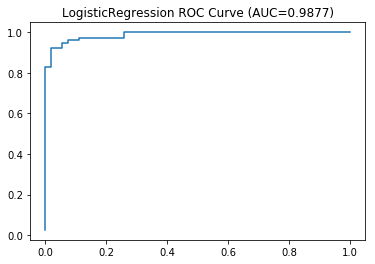

In [401]:
plt_test_roc(LogisticRegression, 'democrat')

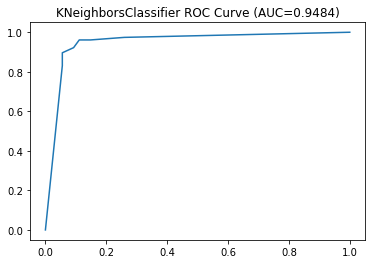

In [403]:
knn_pred = plt_test_roc(KNeighborsClassifier, 'democrat', best_k)

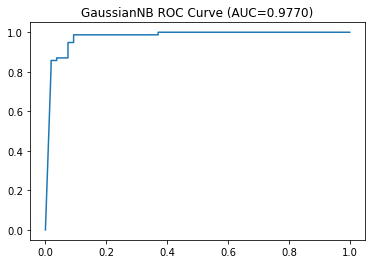

In [404]:
nb_pred = plt_test_roc(GaussianNB, 'democrat')

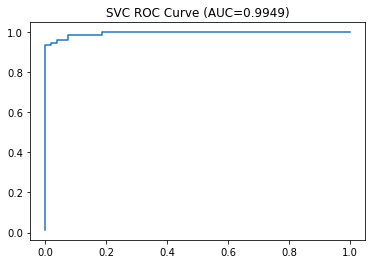

In [405]:
svm_pred = plt_test_roc(SVC, 'democrat', probability = True)

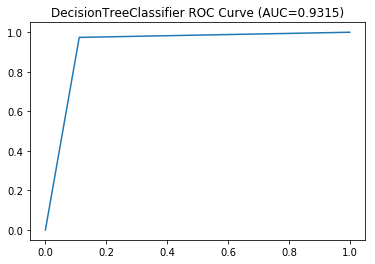

In [406]:
tree_pred = plt_test_roc(DecisionTreeClassifier, 'democrat')

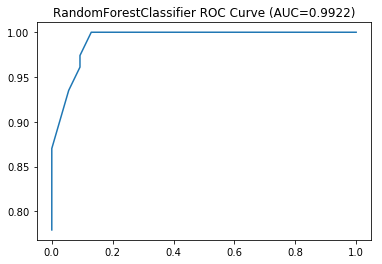

In [407]:
rf_pred = plt_test_roc(RandomForestClassifier, 'democrat')

### Challenge 3

In [408]:
def get_cv_metrics(modelname, *args, **kwargs):
    model = modelname(*args, **kwargs)
    accuracy = np.mean(cross_val_score(model, X, y, scoring = make_scorer(accuracy_score)))
    precision = np.mean(cross_val_score(model, X, y, scoring = make_scorer(precision_score, pos_label = mypos_label)))
    recall = np.mean(cross_val_score(model, X, y, scoring = make_scorer(recall_score, pos_label = mypos_label)))
    f1 = np.mean(cross_val_score(model, X, y, scoring = make_scorer(f1_score, pos_label = mypos_label)))

    print(modelname.__name__, "CV",
      "accuracy", format(accuracy, "8.6f"), 
      "precision", format(precision, "8.6f"), 
      "recall", format(recall, "8.6f"), 
      "f1", format(f1, "8.6f"))
    return accuracy, precision, recall, f1

In [409]:
logr_cv_metrics = get_cv_metrics(LogisticRegression)
knn_cv_metrics = get_cv_metrics(KNeighborsClassifier, best_k)
nb_cv_metrics = get_cv_metrics(GaussianNB)
svm_cv_metrics = get_cv_metrics(SVC)
tree_cv_metrics = get_cv_metrics(DecisionTreeClassifier)
rf_cv_metrics = get_cv_metrics(RandomForestClassifier)

LogisticRegression CV accuracy 0.960920 precision 0.970163 recall 0.966292 f1 0.967864
KNeighborsClassifier CV accuracy 0.933333 precision 0.957892 recall 0.932584 f1 0.945019
GaussianNB CV accuracy 0.931034 precision 0.948219 recall 0.940075 f1 0.943525
SVC CV accuracy 0.954023 precision 0.977123 recall 0.947566 f1 0.961804
DecisionTreeClassifier CV accuracy 0.954023 precision 0.962245 recall 0.958801 f1 0.961984
RandomForestClassifier CV accuracy 0.965517 precision 0.973889 recall 0.970037 f1 0.964003


### Challenge 4

In [526]:
RATING_DICT = {'PG-13': 0, 'R': 1, 'PG': 2, 'G': 3}
movie = pd.read_csv("2013_movies.csv")

In [527]:
X = movie.loc[:, ['Budget', 'DomesticTotalGross', 'Runtime']]
X = X.fillna(X.mean())
y = movie['Rating']
y = label_binarize(y, classes = list(RATING_DICT.keys()))
y = y[:, :3] #note: dropping movies rated "G" dur to lack of variance in the data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

In [529]:
model = LogisticRegression() #model = OneVsRestClassifier(LogisticRegression())
for item in [item for item in RATING_DICT.items() if item[0] != "G"]:
    p = np.mean(cross_val_score(model, X, y[:, item[1]], scoring = make_scorer(precision_score)))
    r = np.mean(cross_val_score(model, X, y[:, item[1]], scoring = make_scorer(recall_score)))
    print(item[0], "precision", p, "recall", r)

PG-13 precision 0.638754696726 recall 0.518055555556
R precision 0.0 recall 0.0
PG precision 0.0 recall 0.0


### Challenge 5

In [410]:
cancer = pd.read_csv("haberman.data", header = None)
cancer.columns = ['age', 'year', 'pos_node', 'Survived']

In [411]:
X = cancer.iloc[:, :-1]
y = cancer.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

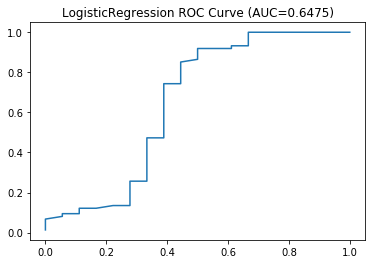

In [414]:
logr_pred = plt_test_roc(LogisticRegression, mypos = 1) #note: predicting cancer['Survived'] == 1